In [1]:
import pandas as pd
import numpy as np
import imageio
import matplotlib.pyplot as plt
from glob import iglob
from sklearn.decomposition import PCA
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_blobs

In [2]:
df=pd.read_csv("Height_Weight.csv")

In [3]:
df

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61
...,...,...,...
495,Female,150,153
496,Female,184,121
497,Female,141,136
498,Male,150,95


In [4]:
df.drop(['Gender'], axis=1)

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
...,...,...
495,150,153
496,184,121
497,141,136
498,150,95


In [5]:
df['BMI'] = df['Weight'] / ((df['Height'] /100)** 2)

In [6]:
df

,Gender,Height,Weight,BMI
0,Male,174,96,31.708284
1,Male,189,87,24.355421
2,Female,185,110,32.140248
3,Female,195,104,27.350427
4,Male,149,61,27.476240
...,...,...,...,...
495,Female,150,153,68.000000
496,Female,184,121,35.739603
497,Female,141,136,68.407022
498,Male,150,95,42.222222


In [7]:
df.drop(['Weight', 'Height'], axis=1)

,Gender,BMI
0,Male,31.708284
1,Male,24.355421
2,Female,32.140248
3,Female,27.350427
4,Male,27.476240
...,...,...
495,Female,68.000000
496,Female,35.739603
497,Female,68.407022
498,Male,42.222222


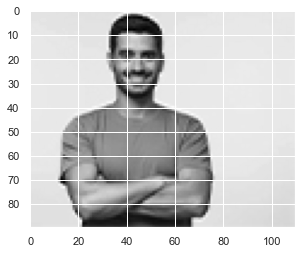

In [45]:
img = imageio.imread("Images/2.jpg")
img = img.astype(np.uint8)
img = img / 255
plt.imshow(img,cmap='gray')

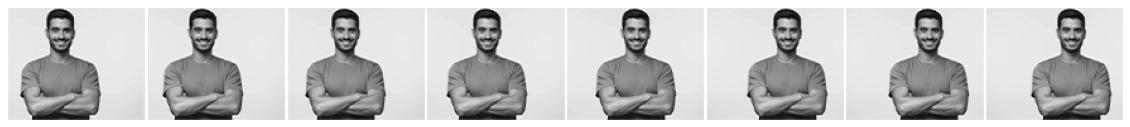

In [46]:
faces = pd.DataFrame([])
for path in iglob('*/*.jpg'):
    img=imageio.imread(path)
    face = pd.Series(img.flatten(),name=path)
    faces = faces.append(face)
 
fig, axes = plt.subplots(1,8,figsize=(20,20),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.iloc[i].values.reshape(90,110),cmap="gray")

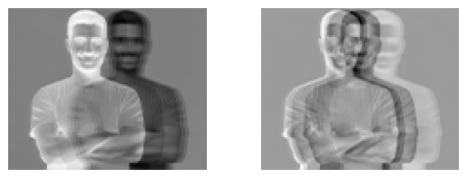

In [48]:
faces_pca = PCA(n_components=0.8)
faces_pca.fit(faces)
fig, axes = plt.subplots(1,2,figsize=(9,3),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces_pca.components_[i].reshape(90,110),cmap='gray')

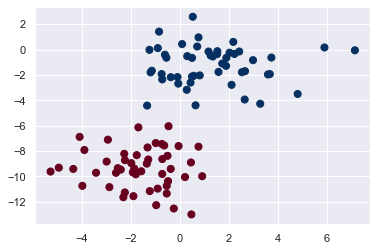

In [11]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [12]:
model = GaussianNB()
model.fit(X, y);

In [13]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

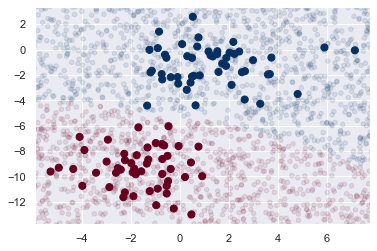

In [29]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [15]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [16]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [17]:
data

{'data': ["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
  "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washingto

In [18]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [19]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline



In [21]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [22]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [30]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
mat

array([[344,  13,  32,   0],
       [  6, 364,  24,   0],
       [  1,   5, 392,   0],
       [  4,  12, 187,  48]], dtype=int64)

In [24]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [31]:
predict_category('moon')

'sci.space'

In [32]:
predict_category('ram')

'comp.graphics'